

Ridge MSE (no CV) - 0.002311395642984554; sklearn - 0.0023113995935233325
Ridge R^2 (no CV) - 0.9719573757713726; sklearn - 0.9719573278421162


ridge_p05_n.png


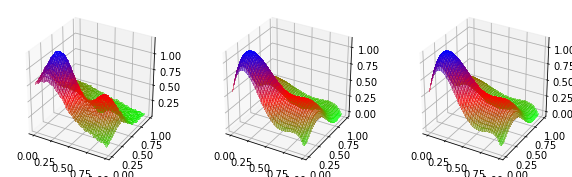

Neural Network

            Start Regression Neural Network 
        No. of hidden layers:        1 
        No. of input data:           800
        No. of input neurons:        21 
        No. of hidden neurons:       21 
        No. of output neurons:       1 
        Activ. Func in Hidden Layer: relu 
        Activ. Func in Output Layer: linear 
        No. of epochs to see:        100
        Optimization Algorithm:      Mini Batch Gradient Descent
        Learning Rate, α:            0.1 
        Regularization param, λ:     0.0001 
                      
Mini Batches
nBatches 400


No handles with labels found to put in legend.


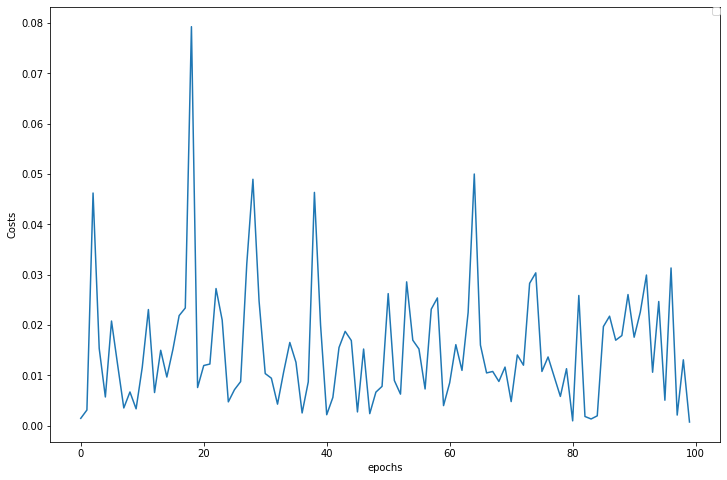

x is (40, 40)
y is (40, 40)
z is (40, 40)


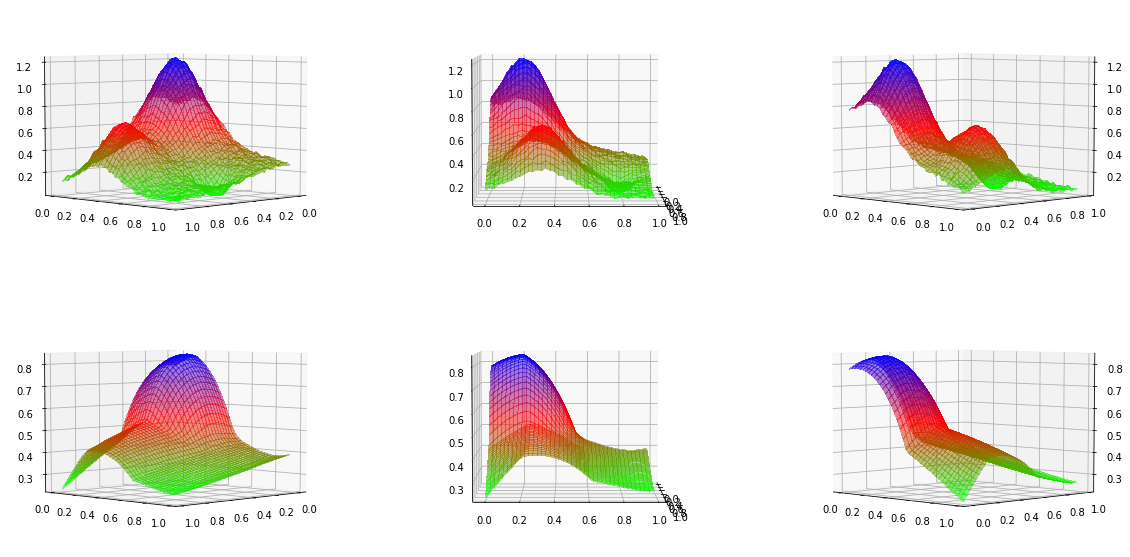

-- Program finished at 12.887192010879517 sec --


In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Nov 13 11:21:05 2019

@author: maksymb
"""

# importing libraries
import os
import sys
import math as mt
import numpy as np
# for polynomial manipulation
import sympy as sp
# from sympy import *
import itertools as it
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sbn
import pandas as pd
import multiprocessing as mp
from joblib import Parallel, delayed

from IPython.display import display, Latex, Markdown

from collections import Counter

# to read parameter file
import yaml


# Scikitlearn imports to check results
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import GridSearchCV, train_test_split, KFold
from sklearn.metrics import confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score, classification_report
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from numpy import argmax

# We'll need some metrics to evaluate our models
from sklearn.neural_network import MLPClassifier, MLPRegressor


import keras
# stochastic gradient descent
from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import History


# importing manually created libraries
import funclib
import neural
import regression
import data_processing

import time


def DoGriSearchRegression(logisticData, i, j, alpha, lmbd):
    
    '''
    1. Big Plot of Franke Function and Corresponding Gradient analysis
    2. Plots of MSE for different parameters (lambda, alpha, bumber of neurons?)
    3. Plots of R2 for different values of the same parameters
    4. Plots of cost function?
    '''
    
    return print(i, j, k, l)

def DoGriSearchClassification(logisticData, i, j, alpha, lmbd):
    # passing data values
    NNType, NNArch, nLayers, nFeatures, \
        nHidden, nOutput, epochs, \
        X, Y, X_train, X_test, Y_train, Y_test, Y_onehot, Y_train_onehot, Y_test_onehot,\
        m, nInput, seed, onehotencoder,\
        BatchSize, Optimization = logisticData


    pipeline = regression.RegressionPipeline()
    # scores to be evaluated
    precision = []
    recall = []
    accuracy = []
    f1 = []
    roc_auc = []
    costsTrain = []
    #print(Y_onehot[10000][:])
    # Getting cost function averaged over all epochs
    # Doing KFold Cross validation - getting appropriate indexes
    kf = KFold(n_splits=5, random_state=1, shuffle=True)
    for train_index, test_index in kf.split(X):
        #print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X[train_index], X[test_index]
        #Y_train, Y_test = Y[train_index], Y[test_index]
        Y_train, Y_test = Y[train_index], Y[test_index]#Y_onehot[train_index-1][:], Y_onehot[test_index-1][:]
        # Training Logistic Regression Model
        costs, modelParams = pipeline.DoLogisticRegression(X_train, \
                                            Y_train, epochs, lmbd, alpha)
        # making prediction (for each splitted set) - fitting
        Y_pred = pipeline.PredictLogisticRegression(X_test, modelParams)
        # getting scores - accuracy, recall, precision, f1, auc
        precision.append(precision_score(Y_test, Y_pred)) 
        recall.append(recall_score(Y_test, Y_pred))
        accuracy.append(accuracy_score(Y_test, Y_pred, normalize=True))
        f1.append(f1_score(Y_test, Y_pred))
        roc_auc.append(roc_auc_score(Y_test,Y_pred))
        costsTrain.append(costs)
        
    # averaged scores for give set of alphas and lambdas
    APrecision = sum(precision)/len(precision)
    ARecall = sum(recall)/len(recall)
    AAccuracy = sum(accuracy)/len(accuracy)
    AF1 = sum(f1)/len(f1)
    
    AROC = sum(roc_auc)/len(roc_auc)

    # for given set of lambda and alpha parameters (regularization and learning rate)
    # I return the set of precision, recall, accuracy and f1 scores
    #myResult = {'lambda='+str(lmbd): [APrecision, ARecall, AAccuracy, AF1], 
    #            'alpha='+str(alpha):[APrecision, ARecall, AAccuracy, AF1]}
    '''
    results = {'lambda='+str(lmbd): [APrecision, ARecall, AAccuracy, AF1], 
               'alpha='+str(alpha):[APrecision, ARecall, AAccuracy, AF1]}
    #alphas  = {alpha:[APrecision, ARecall, AAccuracy, AF1]}
    myResult = pd.DataFrame(results)
    '''
    # decided to go only with accuracy to find the highest value
    #results = {AAccuracy: ['lambda='+str(lmbd)+', alpha='+str(alpha)]}#{'lambda='+str(lmbd)+', alpha='+str(alpha): [AAccuracy]}#, 'alpha='+str(alpha): [AAccuracy]}
    results = {AROC: ['lambda='+str(lmbd)+', alpha='+str(alpha)]}
    myResult = pd.DataFrame(results)
    
    # returning costs and theta parameters
    #costs, theta = pipeline.DoLogisticRegression(X_train, \
#                                                Y_train, epochs, lmbd, alpha)
    # fitting parameters to the data and evaluate all tests etc.
    #Y_pred = pipeline.PredictLogisticRegression(X_test, theta)
    # getting the resulting values, to plot andto fit later on
    #myResult = {alpha: [costs, theta], lambd: [costs, theta]}
    #myResult = {'costs': costs, 'theta': theta, 'lmbd': lmbd, 'alpha': alpha}
    #print('ihgvfghcjghcghhhhhhhhhhhhhhhhhhhhhhhfgchcjhvgmvhjvhvhvhvh')
    # Evaluating scores
    #funclib.ErrorFuncs.own_classification_report(Y_train, Y_pred)
    #Accuracy, Precision, Recall, F1 = funclib.ErrorFuncs.CallF1(Y_train, Y_pred)
    # adding result to the dictionary
    #myResult[alpha] = [Accuracy, Precision, Recall, F1]
    #myResult[alpha][Accuracy, Precision, Recall, F1]

    #the F1-score is simply the harmonic mean of precision (PRE) and recall (REC)

    #F1 = 2 * (PRE * REC) / (PRE + REC)
    
    # If we write the two metrics PRE and REC in terms of 
    # true positives (TP), true negatives (TN), false positives 
    # (FP), and false negatives (FN), we get:
    
    #PRE = TP / (TP + FP)
    #REC = TP / (TP + FN)
    #Thus, the precision score gives us an idea 
    #(expressed as a score from 1.0 to 0.0, from good to bad) 
    #of the proportion of how many actual spam emails (TP) we 
    #correctly classified as spam among all the emails we classified 
    #as spam (TP + FP). In contrast, the recall (also ranging from 1.0 to 0.0) 
    #tells us about how many of the actual spam emails (TP) we "retrieved" or 
    #"recalled" (TP + FN).    
    '''
    1. ROC Curve <= both scikit and manual
    2. Scatter Plot diagram of Actual and Predicted probability
    3. Table of Area Ratio (test data), Accuracy (Test Data), Accuracy (Average),
    F1 score (test data), F1 (score average) <=
    4. Plots of Gradient Descent and MiniBatch Gradient Descent Cost functions
    for  different epochs
    5. plots of ROC and AUC Curves of epochs
    '''
    
    '''
    The corresponding Scikit Learn Alternative. I could've done something like
    GridSearch or other function to tune the parameters, but I am already doing 
    it, by looping over some values.
    '''
    
    return myResult#print(i, j, alpha, lambd)

# Feed Forward Neural Network
def CallKerasModel(NNArch, nLayers):
    classifier = Sequential()
    print("nHidden", nHidden)

    for layer in range(1, nLayers):
        if layer == 0:
            classifier.add(Dense(nHidden, activation=NNArch[layer]['AF'], \
                                 kernel_initializer='random_normal', input_dim=nFeatures))
        elif layer == nLayers-1:
            classifier.add(Dense(nOutput, activation=NNArch[layer]['AF'], \
                                 kernel_initializer='random_normal'))
        else:
            classifier.add(Dense(nHidden, activation=NNArch[layer]['AF'], \
                                 kernel_initializer='random_normal'))
    return classifier

'''
Main Body of the Program
'''

if __name__ == '__main__':
    
    # Estimate how much time it took for program to work
    startTime = time.time()
    
    # Getting parameter file    
    paramFile = 'ParamFile.yaml'
    # getting NN configuration - a lot of parameters to trace T_T
    dataProc = data_processing.NetworkArchitecture(paramFile)
    
    with open(paramFile) as f:
        paramData = yaml.load(f, Loader = yaml.FullLoader)
        
    NNType = paramData['type']
    outputPath = paramData['outputPath']
    if not os.path.exists(outputPath):
        os.makedirs(outputPath)
    
    '''
    So, If the total number of layers = 2, we can switch to Simple Logistic regression.
    However, once the number of layers is > 2, we are going to use Neural Network.
    The number of hidden layers can be specified in the parameter file above 
    (this is done for simplicity). In principle, the Neural network without hidden layers,
    should produc ethe same results as logistic regression (at least, i think so).
    '''
    #acts_hidden = ["logistic", "tanh", "relu"]
    #act_o = "identity"
    # initialising range of lambdas to be searched for
    alphas = paramData['alphas'] #np.logspace(-5, 1, 7)
    lambdas = paramData['lambdas']
    alphas = np.logspace(alphas[0], alphas[1], alphas[2])
    lambdas = np.logspace(lambdas[0], lambdas[1], lambdas[2])
    
    #print(alphas)
    #print(lambdas)
    #[print(i, alpha) for i, alpha in enumerate(alphas)]
    
    #sys.exit()
    

    # Getting the number of processors
    nproc = int(paramData['nProc'])
    # Checking which Problem we are facing
    if (NNType == 'Classification'):
        NNType, NNArch, nLayers, nFeatures, \
        nHidden, nOutput, epochs, alpha, lmbd, \
        X, Y, X_train, X_test, Y_train, Y_test, Y_onehot, Y_train_onehot, Y_test_onehot,\
        nInput, seed, onehotencoder,\
        BatchSize, Optimization = dataProc.CreateNetwork()
        
        
        #print("X is ", X)
        #print("Y is",  Y)
        
        #sys.exit()
        
        #print("nInput", nInput)
        if BatchSize == 0:
            # If batch size is zero, we will use standard Gradient Descent Method
            m = nInput
            #print("m is",m)
        elif BatchSize > 0:
            m = BatchSize
        else:
            print("Incorrect BatchSize. Check Parameter File!")
            sys.exit()
        
        # passing data to the function
        logisticData = NNType, NNArch, nLayers, nFeatures, \
        nHidden, nOutput, epochs, \
        X, Y, X_train, X_test, Y_train, Y_test, Y_onehot, Y_train_onehot, Y_test_onehot,\
        m, nInput, seed, onehotencoder,\
        BatchSize, Optimization
        '''
        # If we want to explore parameter space, we should get data from 
        # the parameter file. So, we need to do a Grid Search for the best
        parameters. As it is expensive operation
        '''
        '''
        Checking the number of layers. If 2 then it is simple classification
        problem. If > 2, we are facing Neural Network. If < 2, you should go
        and check parameter file
        '''
        if (nLayers == 2):        
            print('''
                  =====================================
                  Logistic Regression Via Manual Coding
                  =====================================
                  Activation Function is:    {}
                  No.of test data points:    {}
                  No of epochs to learn:     {}
                  Learning Rate, \u03B1:     {}
                  Regularization param, \u03BB: {}
                              '''.format('function',
                                          X_test.shape[0],
                                          epochs,
                                          alpha,
                                          lmbd)+
                  '''
                  =====================================
                  ''')
            #pipeline = regression.RegressionPipeline()
            
            
            # Getting cost function averaged over all epochs
            #costs, theta = pipeline.DoLogisticRegression(X_train, \
#                                                        Y_train, epochs, lmbd, alpha)
            # getting the resulting values, to plot andto fit later on
            #myResult = {alpha: [costs, theta], lmbd: [costs, theta]}
            # fitting parameters to the data and evaluate all tests etc.
            #Y_pred = pipeline.PredictLogisticRegression(X_test, theta)
            #print(np.shape(Y_pred))
            #print((Y_train))
            #Y_true = Y_train
            #own_classification_report
            
            
            #[print(alpha, lmbd) for i, alpha in enumerate(alphas) for j, lmbd in enumerate(lambdas)]
            
            # enabling parallel processing - returning the list of pandas data frames
            myResults = Parallel(n_jobs=nproc, verbose=10)(delayed(DoGriSearchClassification)\
             (logisticData, i, j, alpha, lmbd) for i, alpha in enumerate(alphas) for j, lmbd in enumerate(lambdas))
            
            df = pd.concat(myResults)
            # fill all NaN values with 0
            df.fillna(0)
            filename = outputPath + '/logistic_regression_table_best_accuracy.csv'
            df.to_csv(filename)
            # getting the maximum for each column and saving it inside another data frame
            df1 = pd.DataFrame(df.max(skipna = True))
            #print(df1.max(axis=0,skipna=True))
            #filename = '1.csv'
            #df1.to_csv(filename)
            '''
            The highest value of accuracy given in the last column (as its name) 
            and the cell values are values for lambda and alpha. So, for given 
            number of epochs, I am getting the following lambda and alphas
            '''
            #print(df.iloc[:,-1])
            params = df.iloc[:,-1].values
            params = [x for x in params if str(x) != 'nan']
            #print(params)
            costsList = []
            paramList = []
            epochs1 = range(epochs)
            fig = plt.figure()
            # okay, I've got a set of parameters  for which I can now plot stuff
            for i in range(len(params)):
                # getting the best parameters - converting string to floats
                par = params[i].split(",") # <= depending on the parameters we choose from this, it will converge slower or faster
                lmbd = par[0].split("=")
                lmbd = float(lmbd[1])
                alpha = par[1].split("=")
                alpha = float(alpha[1])
                # trainging model on best parameters
                pipeline = regression.RegressionPipeline()
                costs, theta = pipeline.DoLogisticRegression(X_train, \
                                                            Y_train, epochs, lmbd, alpha)
                # fitting parameters to the data and evaluate all tests etc.
                Y_pred = pipeline.PredictLogisticRegression(X_test, theta)
                # some values gives very slow learning rate, so witha  
                # given time frame (epochs) the algorithm wouldn't achieve 
                # good results
                if any(cost > 1 for cost in costs):
                    continue
                else:
                    # getting all the parameters again
                    print(classification_report(Y_test, Y_pred))
                    costsList.append(costs)
                    paramList.append(params[i])
                    # Calculating Roc_auc
                    fpr, tpr, thresholds = roc_curve(y_true = Y_test, y_score = Y_pred, pos_label = 1) #positive class is 1; negative class is 0
                    roc_auc = auc(fpr, tpr)
                    lw = 2
                    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
                    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
                    plt.xlim([0.0, 1.0])
                    plt.ylim([0.0, 1.05])
                    plt.xlabel('False Positive Rate')
                    plt.ylabel('True Positive Rate')
                    plt.title('Receiver operating characteristic example')
                    plt.legend(loc="lower right")

            #print(costsList)
            fig,ax = plt.subplots(figsize=(12, 8))
            #print(paramList)
            # plotting costs
            #epochs1 = range(epochs)
            for i in range(len(costsList)):
                plt.plot(epochs1, costsList[i], label = paramList[i])
            plt.legend(loc='upper right', bbox_to_anchor=(1.0, 1.00), borderaxespad=0.)
            plt.ylabel("Costs")
            plt.xlabel("epochs")
            plt.show()
            # saving cost functions
            filename = outputPath + '/'+ 'linreg_costs_e' + str(epochs).zfill(4)+'.png'
            fig.savefig(filename)
            
            # Calculating Roc metrics
            #fpr, tpr, thresholds = roc_curve(y_true = Y_test, y_score = Y_pred, pos_label = 1) #positive class is 1; negative class is 0
            #roc_auc = auc(fpr, tpr)
            
            #fig = plt.figure()
            #lw = 2
            #plt.plot(fpr, tpr, color='darkorange',
            #         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
            #plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
            #plt.xlim([0.0, 1.0])
            #plt.ylim([0.0, 1.05])
            #plt.xlabel('False Positive Rate')
            #plt.ylabel('True Positive Rate')
            #plt.title('Receiver operating characteristic example')
            #plt.legend(loc="lower right")
            #plt.show()
            
            #sys.exit()
            
            '''
            param_grid = dict(batch_size=batch_size, epochs=epochs)
            grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
            grid_result = grid.fit(X, Y)
            # summarize results
            print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
            '''
            
            # Accuracy: checking for 0 occurence
            #Accuracy = (TP + TN) / float(len(Y_true)) if Y_true else 0
            # Precision:
            #Precision = TP / (TP + FP)
            # Recall (should be above 0.5 than it is good)
            #Recall = TP / (TP + FN)
            # F1, could've used 2 * (PRE * REC) / (PRE + REC), but this one doesn't suffer
            # from 0 devision issue
            #F1 = (2 * TP) / (2 * TP + FP + FN)
            #PSP = np.sum(np.where(Y_pred==1,1,0))
            #PSN = np.sum(np.where(Y_pred==0,1,0))
            #SP  = np.sum(np.where(Y_true==1,1,0))
            #SN  = np.sum(np.where(Y_true==0,1,0))
            #ppv=[tn*1.0/pcn, tp*1.0/pcp]
            #trp=[tn*1.0/cn, tp*1.0/cp]
            #Accuracy=(TP + TN)*1.0/(SP + SN)

            # Evaluating scores
            #Accuracy, Precision, Recall, F1 = funclib.ErrorFuncs.CallF1(Y_train, Y_pred)
            #print('nknfsnflibsfksbkfbls')
            # adding result to the dictionary
            #myResult[alpha] = [Accuracy, Precision, Recall, F1]
            #myResult[lmbd] = [Accuracy, Precision, Recall, F1]
            # enabling parallel processing
            #myResult = Parallel(n_jobs=nproc, verbose=10)(delayed(DoGriSearchClassification)\
            # (logisticData, i, j, alpha, lambd) for i, alpha in enumerate(alphas) for j, lambd in enumerate(lambdas))
            print('''
                  =====================================
                  Logistic Regression Via Scikit Learn
                  =====================================
                  Activation Function is:    {}
                  No.of test data points:    {}
                  No of epochs to learn:     {}
                  Learning Rate, \u03B1:     {}
                  Regularization param, \u03BB: {}
                              '''.format('function',
                                          X_test.shape[0],
                                          epochs,
                                          alpha,
                                          lmbd)+
                  '''
                  =====================================
                  ''')
        
            XTrain = X_train
            yTrain = Y_train
            XTest = X_test
            yTest = Y_test
            print("Doing logreg using sklearn")
            #%Setting up grid search for optimal parameters of Logistic regression
            '''
            From Scikit Learn Documentation about scoring:
                
            ‘accuracy’	metrics.accuracy_score	 
            ‘balanced_accuracy’	metrics.balanced_accuracy_score	 
            ‘average_precision’	metrics.average_precision_score	 
            ‘brier_score_loss’	metrics.brier_score_loss	 
            ‘f1’	metrics.f1_score	for binary targets
            ‘f1_micro’	metrics.f1_score	micro-averaged
            ‘f1_macro’	metrics.f1_score	macro-averaged
            ‘f1_weighted’	metrics.f1_score	weighted average
            ‘f1_samples’	metrics.f1_score	by multilabel sample
            ‘neg_log_loss’	metrics.log_loss	requires predict_proba support
            ‘precision’ etc.	metrics.precision_score	suffixes apply as with ‘f1’
            ‘recall’ etc.	metrics.recall_score	suffixes apply as with ‘f1’
            ‘jaccard’ etc.	metrics.jaccard_score	suffixes apply as with ‘f1’
            ‘roc_auc’	metrics.roc_auc_score
            '''
    
            #lambdas=np.logspace(-5,7,13)
            parameters = [{'C': 1./lambdas, "solver":["lbfgs"]}]#*len(parameters)}]
            scoring = ['accuracy','precision', 'recall', 'f1', 'roc_auc']
            logReg = LogisticRegression()
            # Finds best hyperparameters, then does regression.
            gridSearch = GridSearchCV(logReg, parameters, cv=5, scoring=scoring, refit='roc_auc') 
    
            # Fit stuff
            gridSearch.fit(XTrain, yTrain.ravel())
            yTrue, yPred = yTest, gridSearch.predict(XTest)
            print(classification_report(yTrue,yPred))
            rep = pd.DataFrame(classification_report(yTrue,yPred,output_dict=True)).transpose()
            display(rep)
    
            logreg_df = pd.DataFrame(gridSearch.cv_results_) # Shows behaviour of CV
            display(logreg_df[['param_C','mean_test_accuracy', 'rank_test_accuracy','mean_test_roc_auc', 'rank_test_roc_auc']])
    
            logreg_df.columns
            logreg_df.plot(x='param_C', y='mean_test_accuracy', yerr='std_test_accuracy', logx=True)
            logreg_df.plot(x='param_C', y='mean_test_roc_auc', yerr='std_test_roc_auc', logx=True)
            plt.show()
            
            
            #print(myResult)
            '''
            Plotting Results - Cost Function
            '''
            #epochs1 = range(epochs)
            # Plotting results
            #fig,ax = plt.subplots(figsize=(12,8))
        
            #ax.set_ylabel('Costs')
            #ax.set_xlabel('Iterations')

            
            #fig,ax = plt.subplots(figsize=(12, 8))
            #print(paramList)
            # plotting costs
            #ax.plot(epochs1, myResult['costs'],'b.')
            #plt.legend(loc='upper right', bbox_to_anchor=(1.0, 1.00), borderaxespad=0.)
            #plt.ylabel("Costs")
            #plt.xlabel("epochs")
            #plt.show()
            
            '''
            m = np.size(Y_train)
            neuralNet = neural.NeuralNetwork(NNType, NNArch, \
                                             nLayers, nFeatures, \
                                             nHidden, nOutput, \
                                             epochs, alpha, \
                                             lmbd, nInput, seed)
            modelParams, costs = neuralNet.TrainNetwork(X_train, Y_train, m)
            '''
            
        '''
        Doing Neural Networks if the amount of layeres is more than 2
        '''
            
        if (nLayers > 2):
            
            '''
            Switching to Neural Network
            '''
            
            
            
            #m = np.size(Y_train)
            print('Neural Network')
            # passing configuration
            neuralNet = neural.NeuralNetwork(NNType, NNArch, \
                                             nLayers, nFeatures, \
                                             nHidden, nOutput, \
                                             epochs, alpha, \
                                             lmbd, nInput, seed, BatchSize)
            
            
            '''
            1. Add Parallelisation
            2. Add plots
            3. Save all the values for scores etc. to table or whatever
            '''
            #myResult = Parallel(n_jobs=nproc, verbose=10)(delayed(DoGriSearchClassification)\
            # (logisticData, i, j, alpha, lmbd) for i, alpha in enumerate(alphas) for j, lmbd in enumerate(lambdas))
            
            
            
            #print(type(BatchSize))
            if (BatchSize==0):
                print("Gradient Descent")
                
                # evaluating model parameters on test data
                modelParams, costs = neuralNet.TrainNetworkGD(X_train, Y_train_onehot, m)
                # making a prediction
                Y_pred = neuralNet.MakePrediction(X_test, modelParams)
                print('''
                  ===============================
                  Model Evaluation     -   Manual
                  ===============================
{}
Accuracy score on test set: {}
                  ===============================
                  Model Evaluation     -    Keras
                  ===============================
                      '''.format(classification_report(Y_test, Y_pred),
                      accuracy_score(Y_test, Y_pred)))
                
                fig,ax = plt.subplots(figsize=(12, 8))
                #print(paramList)
                # plotting costs
                epochs1 = range(epochs)
                #for i in range(len(costsList)):
                plt.plot(epochs1, costs)
                plt.legend(loc='upper right', bbox_to_anchor=(1.0, 1.00), borderaxespad=0.)
                plt.ylabel("Costs")
                plt.xlabel("epochs")
                plt.show()
                sys.exit()
                #print("Accuracy score on test set: ", accuracy_score(Y_test, Y_pred))
                #print()
            elif (BatchSize > 0):
                # just to make sure m is equal to batch size
                #m = BatchSize
                print("Mini Batches")
                # evaluating costs
                modelParams, costs = neuralNet.TrainNetworkMBGD(X_train, Y_train_onehot, m)#TrainNetworkMBGD(X_train, Y_train_onehot, m)
                # making aprediction
                test_predict = neuralNet.MakePrediction(X_test, modelParams)
                print("Accuracy score on test set: ", accuracy_score(Y_test, test_predict))
                fig,ax = plt.subplots(figsize=(12, 8))
                #print(paramList)
                # plotting costs
                epochs1 = range(epochs)
                #for i in range(len(costsList)):
                plt.plot(epochs1, costs)
                plt.legend(loc='upper right', bbox_to_anchor=(1.0, 1.00), borderaxespad=0.)
                plt.ylabel("Costs")
                plt.xlabel("epochs")
                plt.show()
                
                sys.exit()
            
            
            #modelParams, 
            #print(nHidden)
            # Classify using sklearn
            clf = MLPClassifier(solver="lbfgs", alpha=alpha, hidden_layer_sizes=nHidden)
            clf.fit(X_train, Y_train)
            yTrue, yPred = Y_test, clf.predict(X_test)
            print(classification_report(yTrue, yPred))
            print("Roc auc: ", roc_auc_score(yTrue, yPred))
            
            print('''
                  Initialising Keras
                  ''')
            # decoding from keras
            #print(np.shape(Y_train))
            #Y_train = np.argmax(Y_train, axis=1)#.reshape(1,-1)
            #print(np.shape(Y_train))
            
            classifier = CallKerasModel(NNArch, nLayers)
            
            '''
            To optimize our neural network we use Adam. Adam stands for Adaptive 
            moment estimation. Adam is a combination of RMSProp + Momentum.
            '''
            #print(np.shape(Y_train))
            #Y_train = Y_train.reshape(1,-1)
            #decoded = Y_train.dot(onehotencoder.active_features_).astype(int)
            # invert the one hot encoded data
            #inverted = onehotencoder.inverse_transform([argmax(Y_train[:, :])])
            #print(Y_train)
            #Y_train = Y_train.reshape(-1,1)
            #print(inverted)
            if BatchSize == 0:
                BatchSize = 100
            # Stochatic gradient descent
            sgd = SGD(lr=alpha)
            classifier.compile(optimizer = sgd, loss='binary_crossentropy', metrics =['accuracy'])
            #Fitting the data to the training dataset
            classifier.fit(X_train, Y_train_onehot, batch_size=BatchSize, epochs = epochs)
            np.set_printoptions(precision=4, suppress=True)
            eval_results = classifier.evaluate(X_test, Y_test_onehot, verbose=0) 
            print("\nLoss, accuracy on test data: ")
            print("%0.4f %0.2f%%" % (eval_results[0], eval_results[1]*100))
            
            
            #print("m is ", m)
            
        else:
            '''
            Raise an exception, if number of layers is smaller than 2. It shouldn't be the case,
            because in param file I am specifying number of hidden layers and not the total layers.
            Then I add 2 to that number in the code. But better safe than sorry :) 
            '''
            raise Exception('No. of Layers should be >= {}! Check Parameter File.'.format(nLayers))
    
        
    elif (NNType == 'Regression'):        
        NNType, NNArch, nLayers, \
        nFeatures, nHidden, nOutput, \
        epochs, alpha, lmbd, X, Y, X_train, \
        X_test, Y_train, Y_test, \
        x, y, z,\
        x_rav, y_rav, z_rav, zshape,\
        nInput, seed, BatchSize, Optimization = dataProc.CreateNetwork()
        
        
        #print("X is ", X)
        
        #print("Y is ",  Y)
        
        #sys.exit()
        
        #print("nInput", nInput)
        if BatchSize == 0:
            # If batch size is zero, we will use standard Gradient Descent Method
            m = nInput
            #print("m is",m)
        elif BatchSize > 0:
            m = BatchSize
        else:
            print("Incorrect BatchSize. Check Parameter File!")
            sys.exit()
        
        
        
        '''
        Polynomial Regression on Franke Function
        '''
        if (nLayers == 2):        
            print('''
                  =====================================
                   Linear Regression Via Manual Coding
                  =====================================
                  Activation Function is:    
                  No.of test data points:    
                  No of epochs to learn:     
                  Learning Rate, \u03B1:     
                  Regularization param, \u03BB: 
                              '''#.format('function',
                                 #         X_test.shape[0],
                                 #         epochs,
                                 #         alpha,
                                 #         lmbd)+
                  '''
                  =====================================
                  ''')
            #dataProc.ProcessData()
            
            
            
            
            print('''
                  =====================================
                   Linear Regression Via Scikit Learn
                  =====================================
                  Activation Function is:    
                  No.of test data points:    
                  No of epochs to learn:     
                  Learning Rate, \u03B1:     
                  Regularization param, \u03BB: 
                              '''#.format('function',
                                 #         X_test.shape[0],
                                 #         epochs,
                                 #         alpha,
                                 #         lmbd)+
                  '''
                  =====================================
                  ''')
                
        # If layer more than 2, we are using Neural Network
        if (nLayers > 2): 
            '''
            Switching to Neural Network
            '''
            
            #m = np.size(Y_train)
            print('Neural Network')
            # passing configuration
            neuralNet = neural.NeuralNetwork(NNType, NNArch, \
                                             nLayers, nFeatures, \
                                             nHidden, nOutput, \
                                             epochs, alpha, \
                                             lmbd, nInput, seed, BatchSize)
            
            #print(type(BatchSize))
            #print(X_train)
            if (BatchSize==0):
                print("Gradient Descent")
                
                #print("m is ", m)
                
                modelParams, costs = neuralNet.TrainNetworkGD(X_train, Y_train, m)
                #print(modelParams)
                #print(modelParams)
                
                #print('Y_train_onehot', np.shape(Y_train))
                #print('Y_train_', np.shape(Y_train))
                #print("X_train", "Y_train_onehot")
                

                
                Y_test_pred = neuralNet.MakePrediction(X_test, modelParams)
                
                
                #print(Y_test_pred)
                
                #print('test_predict',np.shape(Y_test))
                #print(Y_test_onehot)
                #print(test_predict)
                #print("Accuracy score on test set: ", accuracy_score(Y_test, test_predict))
                #x = x_rav
                #y = y_rav
                #print("X is", X.shape)
                Y_pred = neuralNet.MakePrediction(X, modelParams)
                
                #print("Y_pred is ", Y_pred)
                
                z = Y_pred.reshape(zshape)
                #print("x is", x.shape)
                #print("y is", y.shape)
                #print("z is", z.shape)
                # takes an array of z values
                #zarray = Y_test_pred
                # output dir
                #output_dir = args[3]
                # filename
                #filename = args[4]
                #print(filename)
                # Turning interactive mode on
                #plt.ion()
                fig = plt.figure()
                axe = fig.add_subplot(1,1,1, projection = '3d')
                #axe.view_init(5,50)
                #axes = [fig.add_subplot(1, 3, i, projection='3d') for i in range(1, len(zarray) + 1)]
                #axes[0].view_init(5,50)
                #axes[1].view_init(5,50)
                #axes[2].view_init(5,50)
                surf = axe.plot_surface(x, y, z, alpha = 0.5,\
                                         cmap = 'brg_r', label="Franke function", linewidth = 0, antialiased = False)
        
                plt.show()
            elif (BatchSize > 0):
                
                
                #  Keras
                # to obtain the history
                #history = History()
                '''
                To optimize our neural network we use Adam. Adam stands for Adaptive 
                moment estimation. Adam is a combination of RMSProp + Momentum.
                '''
                '''
                classifier = CallKerasModel(NNArch, nLayers)
            
                sgd = SGD(lr=alpha)
                classifier.compile(optimizer = sgd, loss='mean_squared_error', metrics =['mse'])
                #Fitting the data to the training dataset
                history = classifier.fit(X, Y, validation_split=0.2, batch_size = BatchSize, epochs = epochs)
                
                fig,ax = plt.subplots(figsize=(12, 8))
                # Plot training & validation loss values
                plt.plot(history.history['loss'])
                #plt.plot(history.history['val_loss'])
                plt.title('Model loss')
                plt.ylabel('Loss')
                plt.xlabel('Epoch')
                plt.legend(['Train', 'Test'], loc='upper left')
                plt.show()
                filename = outputPath + '/'+ 'linreg_manual_costs_e' + str(epochs).zfill(4)+'.png'
                fig.savefig(filename)
                
                # making prediction and plotting franke function
                Y_pred = classifier.predict_classes(X)
                z = Y_pred.reshape(zshape)
                # show the inputs and predicted outputs
                #print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))
                fig = plt.figure(figsize=(10, 5))
                axe = fig.add_subplot(1,1,1, projection = '3d')
                axe.view_init(5,0)
                surf = axe.plot_surface(x, y, z, alpha = 0.5,\
                                         cmap = 'brg_r', label="Franke function", linewidth = 0, antialiased = False)
                filename = outputPath + '/'+ 'linreg_kers_surf_e' + str(epochs).zfill(4)+'.png'
                fig.savefig(filename)

        
                plt.show()
                '''
                
                print("Mini Batches")
                modelParams, costs = neuralNet.TrainNetworkMBGD(X_train, Y_train, m)#TrainNetworkMBGD(X_train, Y_train_onehot, m)
                Y_test_pred = neuralNet.MakePrediction(X_test, modelParams)
                #print('test_predict',np.shape(Y_test))
                #print(Y_test_onehot)
                #print(test_predict)
                #print("Accuracy score on test set: ", accuracy_score(Y_test, test_predict))
                #x = x_rav
                #y = y_rav
                #print("X is", X)
                Y_pred = neuralNet.MakePrediction(X, modelParams)
                
                #print("Y_pred is ", Y_pred)
                
                
                fig,ax = plt.subplots(figsize=(12, 8))
                #print(paramList)
                # plotting costs
                epochs1 = range(epochs)
                #for i in range(len(costsList)):
                plt.plot(epochs1, costs)
                plt.legend(loc='upper right', bbox_to_anchor=(1.0, 1.00), borderaxespad=0.)
                plt.ylabel("Costs")
                plt.xlabel("epochs")
                plt.show()
                # saving cost functions
                filename = outputPath + '/'+ 'linreg_manual_costs_e' + str(epochs).zfill(4)+'.png'
                fig.savefig(filename)
                
                znn_pred = Y_pred.reshape(zshape)
                print("x is", x.shape)
                print("y is", y.shape)
                print("z is", z.shape)
                # takes an array of z values
                #zarray = Y_test_pred
                # output dir
                #output_dir = args[3]
                # filename
                #filename = args[4]
                #print(filename)
                # Turning interactive mode on
                #plt.ion()
                
                def PlotSurface(x, y, z, filename):
                    
                    # output dir
                    #output_dir = args[3]
                    # filename
                    #filename = args[4]
                    #print(filename)
                    # Turning interactive mode on
                    #plt.ion()
                    fig = plt.figure(figsize=(20, 10))
                    axes = [fig.add_subplot(2, 3, i, projection='3d') for i in range(1, len(zarray) + 1)]
                    angles = [45, 0, -45, 45, 0, -45]
                    #axes[0].view_init(5,50)
                    #axes[1].view_init(5,50)
                    #axes[2].view_init(5,50)
                    view = [axes[i].view_init(5, angles[i]) for i in range(6)]
                    surf = [axes[i].plot_surface(x, y, zarray[i], alpha = 0.5,
                                                 cmap = 'brg_r', label="Franke function", linewidth = 0, antialiased = False) for i in range(len(zarray))]
                    # saving figure with corresponding filename
                    #fig.savefig(output_dir + filename)
                    # close the figure window
                    #plt.close(fig)
                    plt.show()
                
                zarray = [z,z,z, znn_pred, znn_pred, znn_pred]
                filename = outputPath + '/'+ 'linreg_manual_surf_e' + str(epochs).zfill(4)+'.png'
                PlotSurface(x, y, zarray, filename)
                
                #fig = plt.figure(figsize=(5, 5))
                #axe = fig.add_subplot(1,1,1, projection = '3d')
                #axe.view_init(5, 90)
                #axes = [fig.add_subplot(1, 3, i, projection='3d') for i in range(1, len(zarray) + 1)]
                #axes[0].view_init(5,50)
                #axes[1].view_init(5,50)
                #axes[2].view_init(5,50)
                #surf = axe.plot_surface(x, y, z, alpha = 0.5,\
                #                         cmap = 'brg_r', label="Franke function", linewidth = 0, antialiased = False)
                #filename = outputPath + '/'+ 'linreg_manual_surf_e' + str(epochs).zfill(4)+'.png'
                #fig.savefig(filename)
        
        
                #plt.show()
                
                # Scikit Learn
                
                #mlpr = MLPRegressor(solver="lbfgs", alpha=alpha, 
                #                   batchsize = m, hidden_layer_sizes = nHidden)
                #mlpr.fit(X_train, Y_train)
                #yTrue, yPred = Y_test, clf.predict(X_test)
                #print(classification_report(yTrue, yPred))
                #print("Roc auc: ", roc_auc_score(yTrue, yPred))
                
                
                #mlpr= MLPRegressor(hidden_layer_sizes=hn,
                #    activation=act_h, 
                #    solver="adam", 
                #    alpha = lmbd, 
                #    learning_rate_init=eta
                #    )
                #mlpr.fit(XTrain, yTrain)

                #yTrue, yPred = yTest, mlpr.predict(XTest)
                #ypred = mlpr.predict(X)
                
                #R2 = mlpr.score(XTest,yTrue.ravel())
                
    
    
    '''
    Plotting Results
    '''
    #epochs1 = range(epochs)
    # Plotting results
    #fig,ax = plt.subplots(figsize=(12,8))

    #ax.set_ylabel('J(Theta)')
    #ax.set_xlabel('Iterations')
    #ax.plot(epochs1, costs,'b.')
    
    # End time of the program
    endTime = time.time()
    print("-- Program finished at %s sec --" % (endTime - startTime))